In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub

from tensorflow.keras import layers
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
_URL = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/K4zxDdv3-cdJng'
zip_dir = tf.keras.utils.get_file('test43.zip', origin=_URL, extract=True)

202506734/202506734 [==============================] - 10s 0us/step


In [ ]:
zip_dir_base = os.path.dirname(zip_dir)
for root, dirs, files in os.walk(zip_dir_base):
    for directory in dirs:
        print(os.path.join(root, directory))

/root/.keras/datasets/mri
/root/.keras/datasets/mri/Testing
/root/.keras/datasets/mri/Training
/root/.keras/datasets/mri/Validation
/root/.keras/datasets/mri/Testing/notumor
/root/.keras/datasets/mri/Testing/glioma
/root/.keras/datasets/mri/Testing/meningioma
/root/.keras/datasets/mri/Testing/pituitary
/root/.keras/datasets/mri/Training/notumor
/root/.keras/datasets/mri/Training/glioma
/root/.keras/datasets/mri/Training/meningioma
/root/.keras/datasets/mri/Training/pituitary
/root/.keras/datasets/mri/Validation/notumor
/root/.keras/datasets/mri/Validation/glioma
/root/.keras/datasets/mri/Validation/meningioma
/root/.keras/datasets/mri/Validation/pituitary


In [ ]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'mri')
train_dir = os.path.join(base_dir,'Training')
train_glioma_dir = os.path.join(train_dir, 'glioma')
train_meningioma_dir = os.path.join(train_dir, 'meningioma')
train_notumor_dir = os.path.join(train_dir, 'notumor')
train_pituitary_dir = os.path.join(train_dir, 'pituitary')

val_dir = os.path.join(base_dir,'Validation')
val_glioma_dir = os.path.join(val_dir, 'glioma')
val_meningioma_dir = os.path.join(val_dir, 'meningioma')
val_notumor_dir = os.path.join(val_dir, 'notumor')
val_pituitary_dir = os.path.join(val_dir, 'pituitary')

test_dir = os.path.join(base_dir,'Testing')
test_glioma_dir = os.path.join(test_dir, 'glioma')
test_meningioma_dir = os.path.join(test_dir, 'meningioma')
test_notumor_dir = os.path.join(test_dir, 'notumor')
test_pituitary_dir = os.path.join(test_dir, 'pituitary')

In [ ]:
num_glioma_tr = len(os.listdir(train_glioma_dir))
num_meningioma_tr = len(os.listdir(train_meningioma_dir))
num_notumor_tr = len(os.listdir(train_notumor_dir))
num_pituitary_tr = len(os.listdir(train_pituitary_dir))

total_train = num_glioma_tr+num_meningioma_tr+num_notumor_tr+num_pituitary_tr

num_glioma_val = len(os.listdir(val_glioma_dir))
num_meningioma_val = len(os.listdir(val_meningioma_dir))
num_notumor_val = len(os.listdir(val_notumor_dir))
num_pituitary_val = len(os.listdir(val_pituitary_dir))

total_val = num_glioma_val+num_meningioma_val+num_notumor_val+num_pituitary_val

num_glioma_test = len(os.listdir(test_glioma_dir))
num_meningioma_test = len(os.listdir(test_meningioma_dir))
num_notumor_test = len(os.listdir(test_notumor_dir))
num_pituitary_test = len(os.listdir(test_pituitary_dir))

total_test = num_glioma_test+num_meningioma_test+num_notumor_test+num_pituitary_test

In [ ]:
print('num_glioma_tr: ', num_glioma_tr)
print('num_meningioma_tr: ', num_meningioma_tr)
print('num_notumor_tr: ', num_notumor_tr)
print('num_pituitary_tr: ', num_pituitary_tr)
print('--')
print('Всего изображений в тренировочном наборе данных: ', total_train)
print('num_glioma_val: ', num_glioma_val)
print('num_meningioma_val: ', num_meningioma_val)
print('num_notumor_val: ', num_notumor_val)
print('num_pituitary_val: ', num_pituitary_val)
print('--')
print('Всего изображений в валидационном наборе данных: ', total_val)
print('num_glioma_test: ', num_glioma_test)
print('num_meningioma_test: ', num_meningioma_test)
print('num_notumor_test: ', num_notumor_test)
print('num_pituitary_test: ', num_pituitary_test)
print('--')
print('Всего изображений в тестовом наборе данных: ', total_test)

num_glioma_tr:  1321
num_meningioma_tr:  1339
num_notumor_tr:  1595
num_pituitary_tr:  1457
--
Всего изображений в тренировочном наборе данных:  5712
num_glioma_val:  300
num_meningioma_val:  306
num_notumor_val:  291
num_pituitary_val:  300
--
Всего изображений в валидационном наборе данных:  1197
num_glioma_test:  317
num_meningioma_test:  256
num_notumor_test:  290
num_pituitary_test:  255
--
Всего изображений в тестовом наборе данных:  1118


In [ ]:
BATCH_SIZE = 16
IMG_SHAPE = 224

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)
val_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory=train_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                                          class_mode='categorical')

Found 5712 images belonging to 4 classes.


In [ ]:
val_data_gen = val_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory=val_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                                          class_mode='categorical')

Found 1197 images belonging to 4 classes.


In [ ]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=test_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE),
                                                              class_mode='categorical')

Found 1118 images belonging to 4 classes.


In [ ]:
class_names = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]

In [ ]:
sample_training_images, y = next(train_data_gen)

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20, 20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

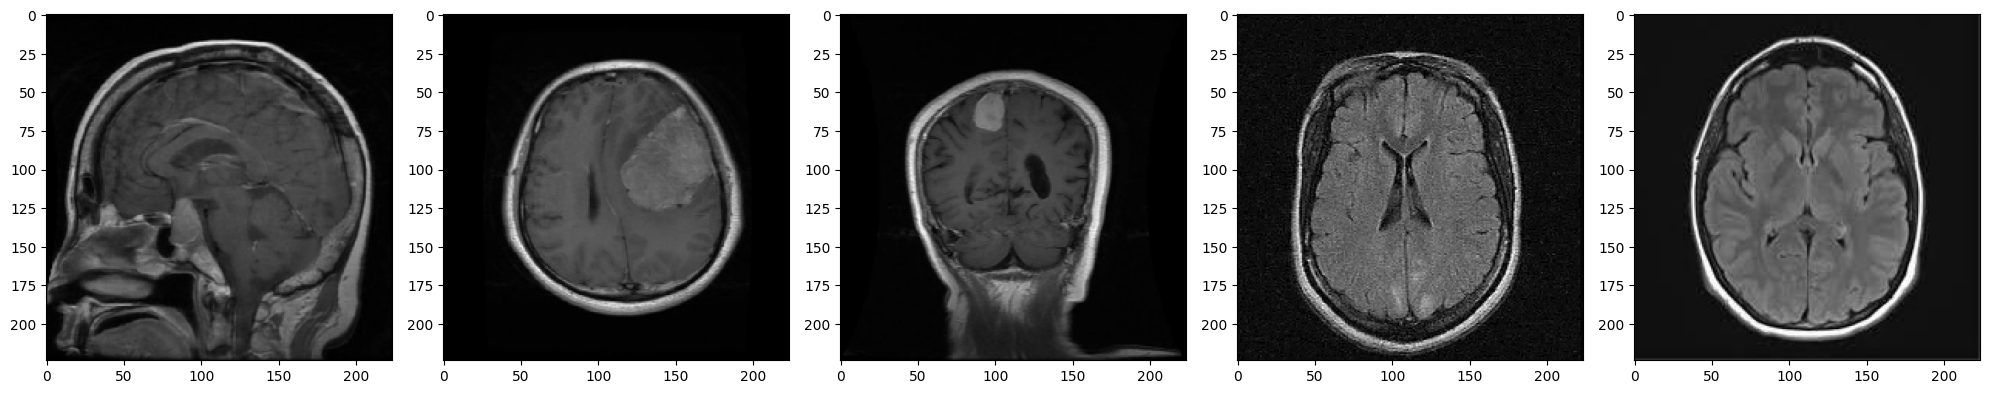

In [ ]:
plotImages(sample_training_images[:5])

In [ ]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(IMG_SHAPE, IMG_SHAPE, 3))

In [ ]:
feature_extractor.trainable = False

In [ ]:
model = tf.keras.Sequential([
  feature_extractor,
  layers.Dense(4, activation='softmax')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_5 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_6 (Dense)             (None, 4)                 5124      
                                                                 
Total params: 2263108 (8.63 MB)
Trainable params: 5124 (20.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'])

EPOCHS = 8

history = model.fit(train_data_gen,
                    epochs=EPOCHS,
                    validation_data=val_data_gen)

Epoch 1/8
357/357 [==============================] - 229s 630ms/step - loss: 0.4732 - accuracy: 0.8277 - val_loss: 0.4326 - val_accuracy: 0.8413
Epoch 2/8
357/357 [==============================] - 229s 641ms/step - loss: 0.2716 - accuracy: 0.8988 - val_loss: 0.3441 - val_accuracy: 0.8713
Epoch 3/8
357/357 [==============================] - 223s 624ms/step - loss: 0.2156 - accuracy: 0.9275 - val_loss: 0.2934 - val_accuracy: 0.8889
Epoch 4/8
357/357 [==============================] - 218s 610ms/step - loss: 0.1861 - accuracy: 0.9356 - val_loss: 0.2432 - val_accuracy: 0.9073
Epoch 5/8
357/357 [==============================] - 223s 626ms/step - loss: 0.1618 - accuracy: 0.9435 - val_loss: 0.2603 - val_accuracy: 0.9023
Epoch 6/8
357/357 [==============================] - 224s 627ms/step - loss: 0.1472 - accuracy: 0.9464 - val_loss: 0.2480 - val_accuracy: 0.9156
Epoch 7/8
357/357 [==============================] - 234s 655ms/step - loss: 0.1298 - accuracy: 0.9576 - val_loss: 0.2054 - val_ac

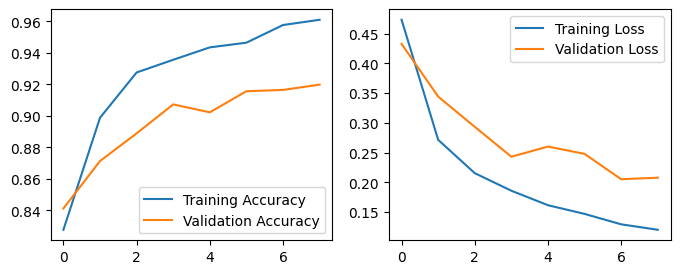

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')

plt.show()

In [ ]:
scores = model.evaluate(test_data_gen, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

70/70 [==============================] - 39s 562ms/step - loss: 1.6906 - accuracy: 0.6118
Доля верных ответов на тестовых данных, в процентах: 61.1807


In [ ]:
test_images, y = next(test_data_gen)

In [ ]:
class_names = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]

In [ ]:
y_pred=model.predict(test_images)

1/1 [==============================] - 1s 1s/step


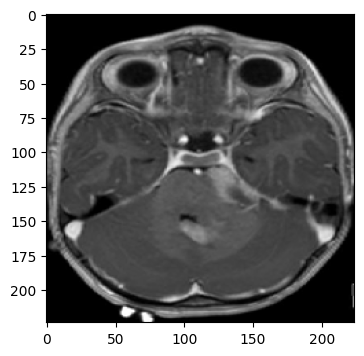

In [ ]:

plt.figure(figsize=(4,4))
plt.imshow(test_images[3])

In [ ]:
k=round(y_pred[3][0])
class_names[k]

'glioma_tumor'

In [ ]:
IMG_SHARE = 299

train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory=train_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                                          class_mode='categorical')
val_data_gen = val_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory=val_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                                          class_mode='categorical')
test_data_gen = test_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=test_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE),
                                                              class_mode='categorical')

URL = "https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4"
feature_extractor = hub.KerasLayer(URL,
  input_shape=(IMG_SHARE, IMG_SHARE, 3),
  trainable=False)

model_inception = tf.keras.Sequential([
  feature_extractor,
  tf.keras.layers.Dense(4, activation='softmax')
])

model_inception.summary()

Found 5712 images belonging to 4 classes.
Found 1197 images belonging to 4 classes.
Found 1118 images belonging to 4 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 21810980 (83.20 MB)
Trainable params: 8196 (32.02 KB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [ ]:
model_inception.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'])

EPOCHS = 8

history = model_inception.fit(train_data_gen,
                    epochs=EPOCHS,
                    validation_data=val_data_gen)

Epoch 1/8
357/357 [==============================] - 832s 2s/step - loss: 0.5274 - accuracy: 0.8018 - val_loss: 0.4689 - val_accuracy: 0.8187
Epoch 2/8
357/357 [==============================] - 825s 2s/step - loss: 0.3265 - accuracy: 0.8789 - val_loss: 0.4205 - val_accuracy: 0.8471
Epoch 3/8
357/357 [==============================] - 884s 2s/step - loss: 0.2663 - accuracy: 0.9062 - val_loss: 0.3647 - val_accuracy: 0.8663
Epoch 4/8
357/357 [==============================] - 824s 2s/step - loss: 0.2297 - accuracy: 0.9158 - val_loss: 0.3115 - val_accuracy: 0.8680
Epoch 5/8
357/357 [==============================] - 829s 2s/step - loss: 0.2017 - accuracy: 0.9298 - val_loss: 0.2762 - val_accuracy: 0.8956
Epoch 6/8
357/357 [==============================] - 880s 2s/step - loss: 0.1870 - accuracy: 0.9333 - val_loss: 0.3335 - val_accuracy: 0.8847
Epoch 7/8
357/357 [==============================] - 824s 2s/step - loss: 0.1637 - accuracy: 0.9440 - val_loss: 0.2680 - val_accuracy: 0.8964
Epoch 

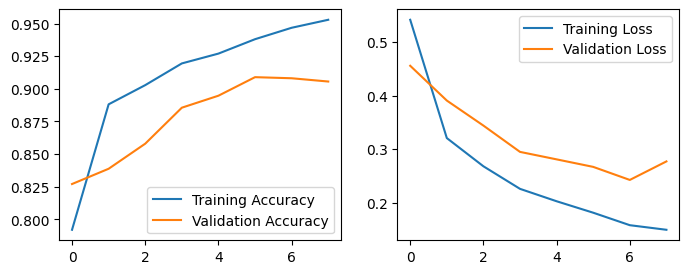

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')

plt.show()

In [ ]:
scores = model_inception.evaluate(test_data_gen, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

70/70 [==============================] - 133s 2s/step - loss: 1.4509 - accuracy: 0.6395
Доля верных ответов на тестовых данных, в процентах: 63.9535


In [ ]:
plt.figure(figsize=(4,4))
plt.imshow(test_images[15])

NameError: name 'test_images' is not defined

<Figure size 400x400 with 0 Axes>

In [ ]:
k=round(y_pred[15][0])
class_names[k]

NameError: name 'y_pred' is not defined

In [ ]:
 from tensorflow.image import resize

1/1 [==============================] - 5s 5s/step


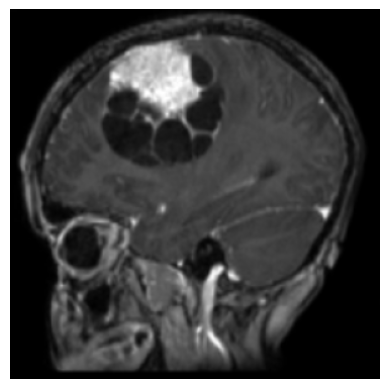

Predicted class: glioma
Actual class: meningioma


In [ ]:
def visualize_image_and_prediction(model, test_data_gen):

    test_batch, test_labels_batch = next(test_data_gen)

    resized_images = []
    for image in test_batch:
        resized_image = resize(image, [299, 299])
        resized_images.append(resized_image)
    resized_images = np.array(resized_images)

    predictions = model.predict(resized_images)

    class_names = list(test_data_gen.class_indices.keys())

    image_index = np.random.randint(0, len(resized_images))
    predicted_class_index = np.argmax(predictions[image_index])
    actual_class_index = np.argmax(test_labels_batch[image_index])

    plt.imshow(resized_images[image_index])
    plt.axis('off')
    plt.show()

    print("Predicted class:", class_names[predicted_class_index])
    print("Actual class:", class_names[actual_class_index])

visualize_image_and_prediction(model_inception, test_data_gen)

1/1 [==============================] - 4s 4s/step


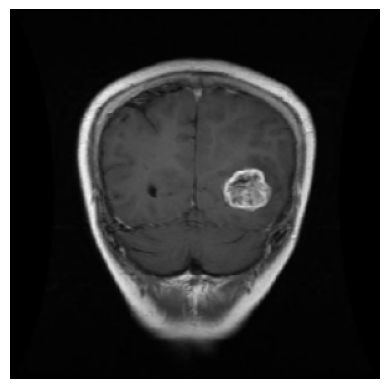

Predicted class: glioma
Actual class: glioma
-----------------------------


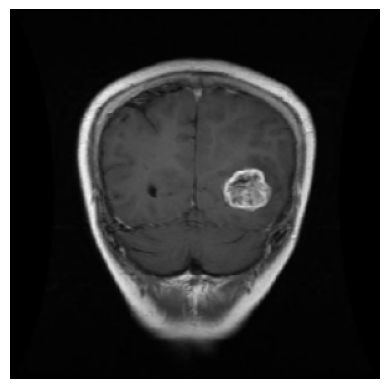

Predicted class: glioma
Actual class: glioma
-----------------------------


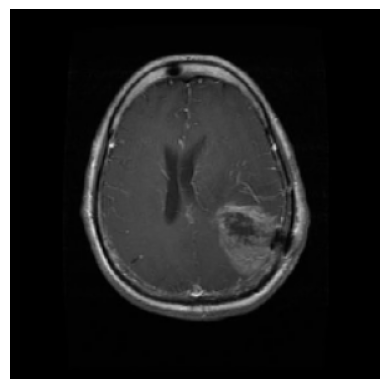

Predicted class: glioma
Actual class: glioma
-----------------------------


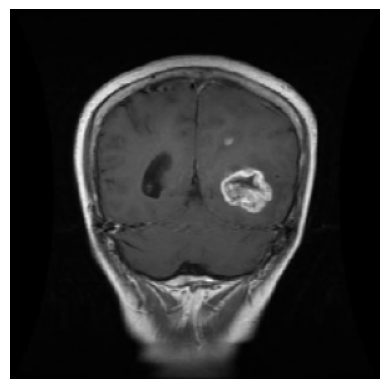

Predicted class: glioma
Actual class: glioma
-----------------------------


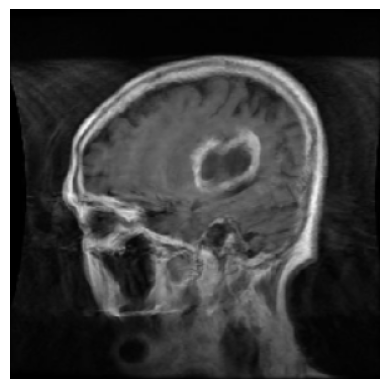

Predicted class: glioma
Actual class: glioma
-----------------------------


In [ ]:
def visualize_image_and_prediction(model, test_data_gen, num_images=3):
    test_batch, test_labels_batch = next(test_data_gen)

    resized_images = []
    for image in test_batch:
        resized_image = resize(image, [299, 299])
        resized_images.append(resized_image)
    resized_images = np.array(resized_images)

    predictions = model.predict(resized_images)

    class_names = list(test_data_gen.class_indices.keys())

    for i in range(num_images):
        image_index = np.random.randint(0, len(resized_images))
        predicted_class_index = np.argmax(predictions[image_index])
        actual_class_index = np.argmax(test_labels_batch[image_index])

        plt.imshow(resized_images[image_index])
        plt.axis('off')
        plt.show()

        print("Predicted class:", class_names[predicted_class_index])
        print("Actual class:", class_names[actual_class_index])
        print("-----------------------------")

visualize_image_and_prediction(model_inception, test_data_gen, num_images=5)